# **Capstone Project:** Music Recommendation System
 **Author:** Benjamin Cooper
 <br>
 
 **Date:** 04/13/2023


## **Problem Definition**

### **The Context:**

        With the advent of smartphones and the consumer economy, there has been a revolution in the ways that people consume products and content. At the same time, digital music and digital music distribution platforms have become some of the most widely accessible and highly consumed product markets in the world. Yet with this deluge of digital music content comes a challenge: how do users find new content that they enjoy, and how do digital music platforms enable music discovery by users? These challenges are exacerbated by the fact that in the modern fast-paced world, people are often time or attention limited, there are other platforms competing for user attention, and digital content-based company's revenue often relies on the time consumers spend on, or interact with, its platform. These companies need to be able to figure out what kind of content is needed in order to increase customer time spent on their platform, the ammount of interaction had with their platform, and the overall satisfaction with a users experience on the platform. The key challenge for companies is in figuring out what kind of content their users are most likely to consume. 

        Spotify is one such music content provider with a huge market base across the world. With the ever-increasing volume of streaming music becoming available, finding new music of interest has become a tedious task in and of itself. Spotify has grown significantly in the market because of its ability to make highly personalized music recommendations to each and every user of its platform based on a huge preference database gathered over time - millions of customers and billions of songs. This is done by using smart recommendation systems that can recommend songs based on users’ likes/dislikes, incorporating both content-based and latent features for song recommendations. However, the recommendation system used by Spotify and its parameter settings have remained a proprietary, closely-guarded secret. Here, I build a recommendation system to provide a top 10 of personalized song recommendations to a user that the user is most likely to enjoy/like/interact-with based on that users personal musical preferences.

### **The objective:**

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

### **The key questions:**

- What is the structure of the dataset?
- What variables will be used to make the recommendation system?
- What is the distribution of the 'rating' variable?
- Which models will be used to build a recommendation system?
- How will models be evaluated?
- Based on criteria, which model is 'best'?
- Is this model good enough for production?

### **The problem formulation**:

Using data science, we are trying to provide personalized song recommendations (the 'best' songs) to a user that that user is most likely to enjoy/like/interact-with the most based on that users personal musical preferences. 

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

__song_data__

- song_id - A unique id given to every song

- title - Title of the song

- Release - Name of the released album

- Artist_name - Name of the artist 

- year - Year of release

__count_data__

- user _id - A unique id given to the user

- song_id - A unique id given to the song

- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [21]:
# Install the surprise package using pip. Only have do do this the first time, Uncomment and run the below code to do the same
# !pip install surprise 

In [173]:
# Used to ignore the warning given as output of the code
import warnings                                 
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np                              
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt   
%matplotlib inline
import matplotlib.ticker as ticker
# Slightly advanced library for data visualization
import seaborn as sns                           

# A dictionary output that does not raise a key error
from collections import defaultdict             

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error  

# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For model validation
from surprise.model_selection import cross_validate

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

# model avaluation 
from surprise.accuracy import rmse, mae

# For scaling the counts
from sklearn import preprocessing

from surprise import SVDpp
from surprise import accuracy

# Importing nltk (natural language toolkit library)
import nltk

# This is importing regular expression
import re

# Word_tokenize is used to do tokenization
from nltk import word_tokenize

# Importing the Lematizer 
from nltk.stem import WordNetLemmatizer

# Importing the stopwords
from nltk.corpus import stopwords

# Tfidf vectorizer used to create the computational vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# To find the similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity 

In [23]:
# # Only have to download first time running:
# nltk.download('omw-1.4')

# # Downloading punctuations
# nltk.download('punkt')

# # Downloading stopwords
# nltk.download('stopwords')

# # Downloading wordnet
# nltk.download('wordnet') 

### **Load the dataset**

In [204]:
# Importing the datasets
sdf = pd.read_csv('./datasets/song_data.csv', header = 0) # There are headers in the data file
cdf = pd.read_csv('./datasets/count_data.csv', header = 0) # There are headers in the data file
cdf = cdf.drop('Unnamed: 0', axis = 1) # Dropping extra index

### **Understanding the data by viewing a few observations**

In [25]:
# See top 10 records of count_df data
cdf.head(10)

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [26]:
# See top 10 records of song_df data
sdf.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [27]:
# See the info of the count_df data
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [28]:
# See the info of the song_df data
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
- The Count dataset has 3 columns (user_id, song_id, and play_count)
- The Count dataset has 2,000,000 observations
- The Songs dataset has 5 columns (song_id,title,release,artist_name,year)
- The Songs dataset has 1,000,000 observations
- There are some missing titles and releases
- The primary/foreign key to merge these two datasets is song_id

In [205]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously 
cdf_full = pd.merge(cdf, sdf, on = 'song_id', how = 'left')
# Drop uneeded columns
cdf_full = cdf_full[['user_id','song_id','title','release','artist_name','year','play_count']]

#### **Observations and Insights:**
- The user_id and song_id are encrypted and can be encoded. However, this could cause problems if we were working on a real life data science business problem where user_id and song_id might need to be retained, or if later on in this analysis we wanted to encorporate other features from the 1 million songs data set online. Therefore, I will not encode these. 
- As the data also contains users who have listened to very few songs and vice versa, filtering these records out of the data could 'get two birds with one stone' by decreasing the **cold start** problem, and decreasing the **computational resources** needed to analyze this large dataset.

==> NOTE <== <br>
A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, here we filter the dataset.
To do this, we will set a threshold and filter out all users who have listened to less than 90 songs,
and any songs that have been listen to less than 120 times

Now we will filter the dataset to decrease its size and reduce the class imbalance.

### Scaling play_count Method 1:
Because there are very few users who have listened to a song more than 5 times, we will set a threshold at 5 plays. We dont want to drop records with more than 5 plays because this is important information on users likes, but we can clip anything > 5 to 5.

In [191]:
# first, we make a copy of the data frame
cdf_filtered = cdf_full.copy()

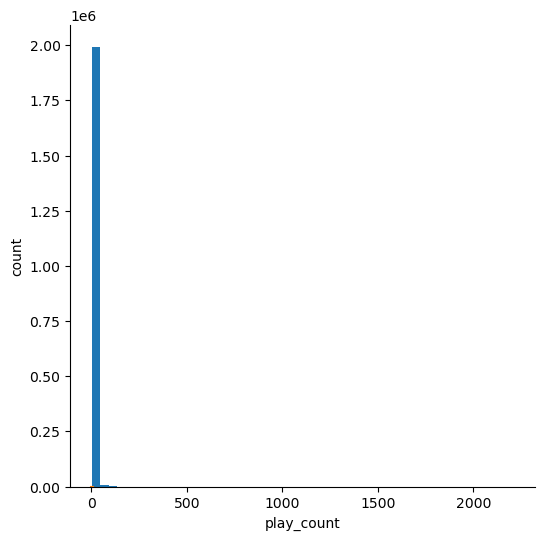

In [227]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.hist(cdf['play_count'], bins=50)
plt.ylabel('count')
plt.xlabel('play_count')
ax.plot(x, y)

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

plt.show()

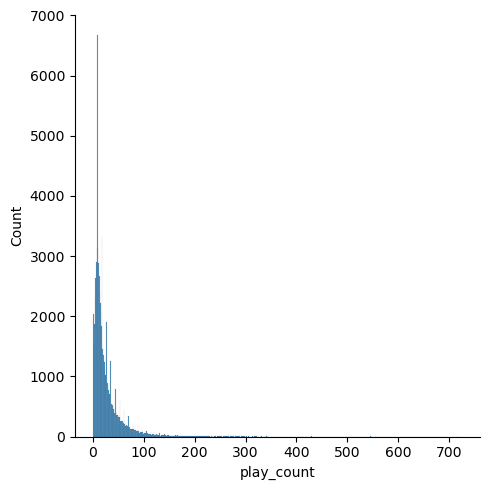

In [192]:
sns.displot(cdf_full.groupby('user_id')['play_count'].count())

From this distribution plot, we can see that the number of songs played by each user (lets call it user interactions) is heavily right skewed. There are many (thousands) users who have only listened to a few songs, so any matrix we build from this data will be extremely sparse. We will attempt to reduce this by filtering out users who have less than a minimum number of total plays (therefore we have very little user preference data for them).

In [195]:
# filtering out users with less than 90 total plays, this gives us a data set of more active users
user_counts = cdf_filtered.groupby('user_id')['play_count'].sum()
user_counts = user_counts[user_counts >= 90]
# now apply mask filter
cdf_filtered = cdf_filtered[cdf_filtered.user_id.isin(user_counts.index)]
cdf_filtered.reset_index(drop=True, inplace=True)

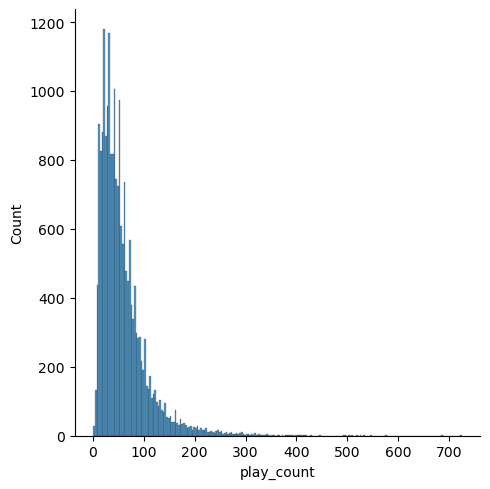

In [196]:
sns.displot(cdf_filtered.groupby('user_id')['play_count'].count())

In [197]:
cdf_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224498 entries, 0 to 1224497
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1224498 non-null  object
 1   song_id      1224498 non-null  object
 2   title        1224498 non-null  object
 3   release      1224498 non-null  object
 4   artist_name  1224498 non-null  object
 5   year         1224498 non-null  int64 
 6   play_count   1224498 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 65.4+ MB


Filtering out less active users has decreased the imbalance somewhat. We still have a heavily right skewed distribution plot, but the class imbalance has been reduced by a factor of 5 (y limit is 1200 instead of 7000). This has also decreased the size of the dataset to 1.2 million records down from 2 million. <br><br>
Now lets continue to decrease the sparcity and imbalance of the data by filtering out any user/song records that have a play count less than 6. There are many more songs that users have only listened to 1 or a few times. We are trying to recommend highly rated songs, so we will get rid of these songs with low interactions and assume they are uninteracted with 'not-liked'.

In [198]:
# filtering out songs with less than 6 plays for a user
play_counts = cdf_filtered[['user_id','play_count']]
play_counts = play_counts.loc[play_counts['play_count'] > 5,]
# now apply mask filter
cdf_filtered = cdf_filtered[cdf_filtered.index.isin(play_counts.index)]
cdf_filtered.reset_index(drop=True, inplace=True)

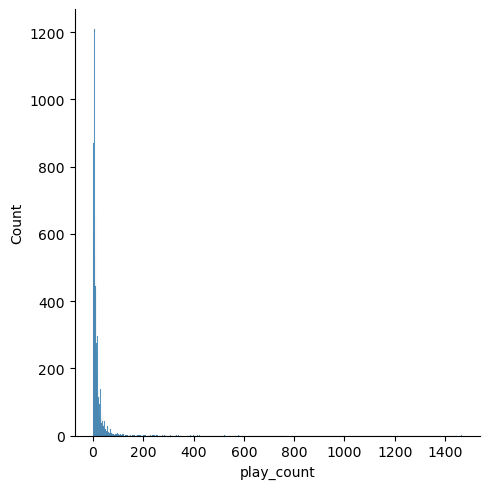

In [199]:
sns.displot(cdf_filtered.groupby('song_id')['play_count'].count())

In [200]:
cdf_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185694 entries, 0 to 185693
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      185694 non-null  object
 1   song_id      185694 non-null  object
 2   title        185694 non-null  object
 3   release      185694 non-null  object
 4   artist_name  185694 non-null  object
 5   year         185694 non-null  int64 
 6   play_count   185694 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 9.9+ MB


We were able to dramatically reduce the size of the dataset with the previous step by 85%, this will speed up processing times for our models and also make the predictions more accurate by reducing the class imbalance. We can see in the above plot however, that there are still many songs that have only been played for a few users. This means that the matrix resulting from this data will still have a lot of sparcity. 
<br><br>Lets filter out all songs that have less than 20 user interactions:

In [201]:
# filtering out songs with less than 200 interactions
song_counts = cdf_filtered.groupby('song_id')['play_count'].count().sort_values(ascending=False)
song_counts = song_counts[song_counts >= 20]
# now apply mask filter
cdf_filtered = cdf_filtered[cdf_filtered.song_id.isin(song_counts.index)]
cdf_filtered.reset_index(drop=True, inplace=True)

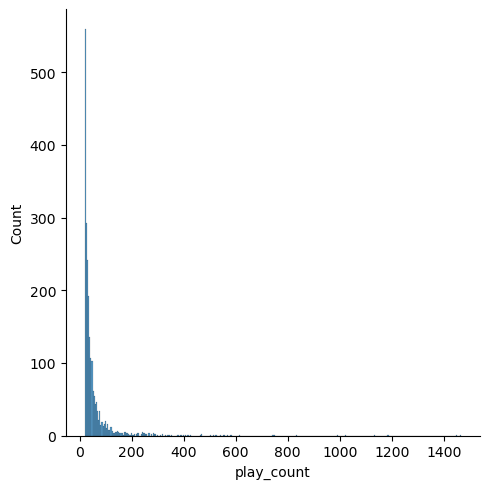

In [202]:
sns.displot(cdf_filtered.groupby('song_id')['play_count'].count())

<AxesSubplot: >

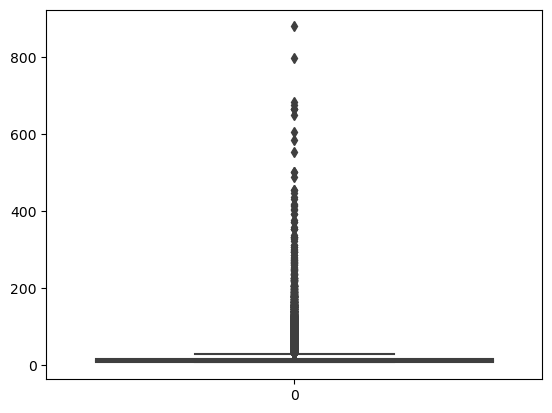

In [41]:
#still a lot of 1's
sns.boxplot(cdf_filtered['play_count'])

In [42]:
cdf_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124147 entries, 0 to 124146
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      124147 non-null  object
 1   song_id      124147 non-null  object
 2   title        124147 non-null  object
 3   release      124147 non-null  object
 4   artist_name  124147 non-null  object
 5   year         124147 non-null  int64 
 6   play_count   124147 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 6.6+ MB


With these filtering steps, we have reduced the class imbalance, decreased the size of the dataset to make models and gridsearch more tracteable, and we have decreased the extreme sparcity of our resulting recommendations matrices. Now we apply a threshhold limit to further reduce class imblance and the play_count range, and then apply a min max scalar to standardize the play_counts as a proxy for a 1-10 rating.

### Clipping and Scaling play_count:
Because there are very few users who have listened to a song more than 25 times, we will set a threshold at 25 plays. We dont want to drop records with more than 5 plays because this is important information on users likes, but we can clip anything > 25 to 25. Then we will apply a MinMaxScalar function from the sklearn package to scale the playcounts from 1-10.

In [43]:
# First make a copy of the dataframe
cdf_filtered = cdf_filtered.copy()
# Clip records with play_count more than(>) 5
cdf_filtered['play_count_scaled'] = cdf_filtered['play_count'].clip(upper=25).astype(int)
trans = preprocessing.MinMaxScaler(feature_range=(1,10))
cdf_filtered['play_count_scaled'] = trans.fit_transform(cdf_filtered['play_count_scaled'].array.reshape(-1, 1))

In [44]:
cdf_filtered.drop_duplicates(inplace=True)
cdf_filtered.reset_index(drop=True, inplace=True)

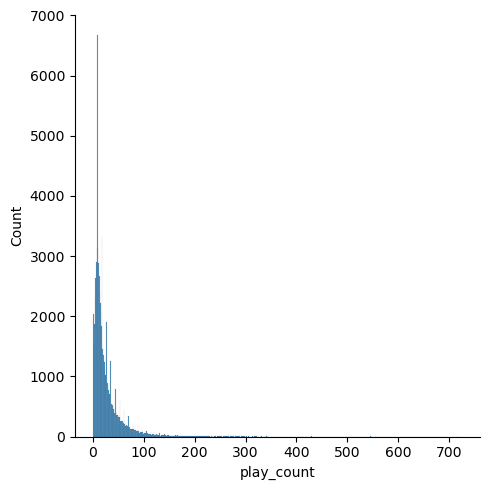

In [194]:
sns.displot(cdf_filtered.groupby('user_id')['play_count'].count())

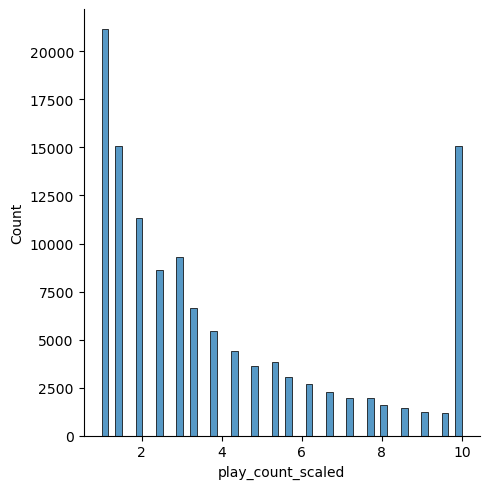

In [45]:
# plot distribution of scaled play_counts
sns.displot(cdf_filtered,x=cdf_filtered['play_count_scaled'])

Our final play_counts, filtered, clipped and scaled look pretty good. The class imbalance between the left side of the X axis and the higher play_counts has been reduced, The play_counts are scaled from 1-10, and we have kept the records containing the highest ratings as 10's.

In [46]:
# Check the shape of the data
cdf_filtered.shape

(121900, 8)

The final dataset has 121,900 records. This is a much more maneagable number of records for training and testing models. We want to check tht we did not drop too many users or songs. After previous iterations testing the filtering, I had dropped over 90% of the songs so the final recommendations that were being made were not diverse and nearly the same for every user. Lets take a look at this and some other parts of the dataset in Exploratory Data Analysis...

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [47]:
# Display total number of unique user_id
print('Number of unique USERS = ',cdf_filtered['user_id'].nunique())

Number of unique USERS =  19212


Total number of unique song id

In [48]:
# Display total number of unique song_id
print('Number of unique SONGS = ',cdf_filtered['song_id'].nunique())

Number of unique SONGS =  2210


Total number of unique artists

In [49]:
# Display total number of unique artists
print('Number of unique artists = ',cdf_filtered['artist_name'].nunique())

Number of unique artists =  1194


#### **Observations and Insights:**
- There are 19212 unique users remaining in the dataset after filtering
- There are 2210 unique songs remaining in the dataset after filtering 
- There are 1194 Unique artists remaining in the dataset after filtering
- This looks like a great balance, we have filtered out rare users and songs but retained many different users and we have a diversity of songs and artists.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [50]:
# The top 10 most interacted songs:
cdf_filtered.groupby('song_id')['play_count'].count().reset_index().sort_values('play_count', ascending=False)[:10]

,song_id,play_count
138,SOBONKR12A58A7A7E0,1466
80,SOAUWYT12A81C206F1,1445
1624,SOSXLTC12AF72A7F54,1186
478,SOFRQTD12A81C233C0,1133
88,SOAXGDH12A8C13F8A1,1024
357,SOEGIYH12A6D4FC0E3,993
1188,SONYKOW12AB01849C9,831
1901,SOWCKVR12A8C142411,748
1343,SOPUCYA12A8C13A694,744
647,SOHTKMO12AB01843B0,616


Most interacted users

In [51]:
# The top 10 most active users:
cdf_filtered.groupby('user_id')['play_count'].count().reset_index().sort_values('play_count', ascending=False)[:10]

,user_id,play_count
5683,4be305e02f4e72dad1b8ac78e630403543bab994,106
766,0a4c3c6999c74af7d8a44e96b44bf64e513c0f8b,82
827,0b19fe0fad7ca85693846f7dad047c449784647e,81
8262,6d625c6557df84b60d90426c0116138b617b9449,74
16334,da3890400751de76f0f05ef0e93aa1cd898e7dbc,69
7930,695179610d0b1fbb9d66267a3bd24946617af7fb,67
17477,e9a7dba8248ced646ea192016660e3c9056c0d03,66
2996,283882c3d18ff2ad0e17124002ec02b847d06e9a,65
5405,48567d388c6a7dda0e9d0a7b6648bdb42440475c,65
10463,8c78c69701072e204f4340ca4d6ee44fe39e40cc,64


#### **Observations and Insights:**
- The most interacted song is 'SOBONKR12A58A7A7E0' which has been interacted with by 1466 different users
- The most active user is '4be305e02f4e72dad1b8ac78e630403543bab994', they have listened to 106 different songs

Songs played in a year

In [52]:
# Find out the number of songs released in a year
cdf_filtered.groupby('year')['play_count'].count().reset_index().sort_values('play_count', ascending=False).T

,0,49,48,47,46,43,45,50,41,42,...,17,21,7,6,3,5,12,1,2,4
year,0,2009,2008,2007,2006,2003,2005,2010,2001,2002,...,1977,1981,1967,1966,1962,1965,1972,1958,1960,1963
play_count,26580,12782,10616,7499,6693,5718,4861,4617,4316,4147,...,151,145,137,134,113,110,77,66,62,61


Text(0, 0.5, 'number of releases')

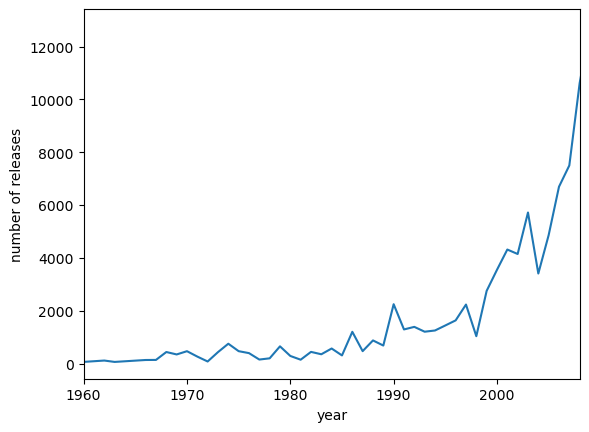

In [53]:
# Create a barplot plot with y label as "number of titles released" and x -axis year and remove '0' year
sns.lineplot(cdf_filtered.loc[cdf_filtered['year']>0,['year','play_count']].groupby('year').count().reset_index(), x='year', y='play_count')
# set x lims to years of data
plt.xlim(1960,2008)
# set plot axis labels
plt.ylabel("number of releases")

#### **Observations and Insights:** 
- It is not clear whether the 'year' feature is, but it is most likely the year a song/album was released.
- We can clearly see that there in an increasing trend from 1960-2008 in the number of songs released
- This makes sense as there are more people, more artists, and musical equiptment, recording equiptment, and streaming platforms have made it easier to produce music

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

## Building a baseline popularity-based recommendation systems

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

#### Function for Rank Based Recommendation System

Let's create a function to find the top n songs for a recommendation based on the average play count of song. We will also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [54]:
def rank_based_rs(n, min_interaction=1):
    '''
    popularity-based recommender function to find top n songs with minimum number of interactions
    parameters:
    n = top number of songs to recommend
    min_interaction = minimum number of interactions a song needs to have to be conidered (optional, default =1)
    '''
    # Calculate the average play_count/user for each song 
    average_plays= cdf_filtered.groupby(['song_id']).mean()['play_count']

    # Calculate the total number of interactions for each song
    count_plays = cdf_filtered.groupby(['song_id']).count()['play_count']

    # Calculate the total number of plays for each song
    sum_plays = cdf_filtered.groupby(['song_id']).sum()['play_count']

    # Create a dataframe with calculated average, interactions, and counts of plays
    final_counts = pd.DataFrame({'avg_plays' : average_plays, 'count_plays' : count_plays, 'sum_plays' : sum_plays})

    # Sort the dataframe by average of ratings in the descending order
    final_counts = final_counts.sort_values('avg_plays',ascending=False)

    # Finding products with minimum number of interactions
    recommendations = final_counts[final_counts['count_plays'] > min_interaction]
    
    # Sorting values with respect to average rating 
    recommendations = recommendations.sort_values(by = 'avg_plays', ascending = False)
    
    recommendations = pd.DataFrame({'song_id':recommendations.index[:n]})

    # df_rec = cdf_filtered.loc[cdf_filtered['song_id'].isin(recommendations),['song_id','title','artist_name','year']]
    recommendations = pd.merge(recommendations,cdf_filtered, on ='song_id', how ="left")
    recommendations = recommendations[['title','artist_name']].drop_duplicates().reset_index(drop=True)
    return recommendations

In [55]:
# Recommend top 10 songs using the function defined above, with minimum 50 interactions
popularity_recommendations = rank_based_rs(10,50)
popularity_recommendations

,title,artist_name
0,221,keller williams
1,Call It Off (Album Version),Tegan And Sara
2,Clara meets Slope - Hard To Say,Clara Hill
3,Kelma,Rachid Taha
4,Numb (Album Version),Disturbed
5,Voices On A String (Album Version),Thursday
6,What If I Do?,Foo Fighters
7,Encore Break,Pearl Jam
8,Reign Of The Tyrants,Jag Panzer
9,Dance_ Dance,Fall Out Boy


# Part I: Collaborative Filtering, Matrix Factorization, and Clustering

### Some useful functions

**Think About It:** Which metric should be used for this problem to compare different models?

Function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance:

In [57]:
def precision_recall_at_k(model, k = 10, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions = model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    
    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    rmse = accuracy.rmse(predictions)
    
    mae = accuracy.mae(predictions)
    
    # print('Precision: ', precision) # Command to print the overall precision
    
    # print('Recall: ', recall) # Command to print the overall recall
    try:
        f1_score = round((2*precision*recall)/(precision+recall), 3)
        # print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score
    except: 
        f1_score = 'NaN'
        
    return rmse, mae, precision, recall, f1_score

Function to get top n recommendations for a user based on model predictions:

In [58]:
def get_recommendations(data, user_id, algo, top_n=10):
    '''
    Below we will be implementing a function where the input parameters are:

    - data: A **rating** dataset
    - user_id: A user id **against which we want the recommendations**
    - top_n: The **number of movies we want to recommend**
    - algo: The algorithm we want to use **for predicting the ratings**
    - The output of the function is a **set of top_n items** recommended for the given user id based on the given algorithm
    
    '''
    # Creating an empty list to store the recommended song IDs
    recommendations = []
    
    # Creating an user-item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count_scaled')
    
    # Extracting those movie IDs which the userId has not interacted yet
    non_interacted_movies = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the movie IDs which userId has not interacted yet
    for item_id in non_interacted_movies:
        
        # Predicting the ratings for those non interacted movie IDs by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)
    
    # This is for making a rec list with actually song names instead of song id's:
    df_recs = pd.DataFrame(recommendations[:top_n], columns = ['song_id','plays_count_scaled'])
    df_recs = pd.merge(df_recs,cdf_filtered[['song_id','title','artist_name']], on ='song_id', how ="left")
    df_recs = df_recs[['title','artist_name']].drop_duplicates().reset_index(drop=True)
    # print(df_recs)
    # Returing top n highest predicted rating movies for this user
    return recommendations[:top_n]

Function to **tune recommendations by song popularity** - corrects the predicted interaction with a song by applying a weight to increase the 'rating' of songs that are in general more popular among users:

In [59]:
def ranking_songs(recommendations):
    '''
    While comparing the ratings of two products, it is not only the ratings that describe the likelihood of the user to that product. 
    Along with the rating, the number of users who have seen that product also becomes important to consider. 
    Due to this, we have calculated the "corrected_ratings" for each product. 
    Commonly higher the "rating_count" of a product more it is liked by users. To interpret the above concept, 
    a product rated 4 with rating_count 3 is less liked in comparison to a product rated 3 with a rating count of 50. 
    It has been empirically found that the likelihood of the product is directly proportional to the inverse of the square root of the rating_count of the product.
    
    Note: For corrected rating, we can add the quantity `1 / np.sqrt(n)` instead of subtracting it to get more optimistic predictions. 
    Here we are subtracting this quantity, as there are no play counts above 10 after scaling.
    '''
    # Calculate the average play_count/user for each song 
    average_plays= cdf_filtered.groupby(['song_id']).mean()['play_count']

    # Calculate the total number of interactions for each song
    count_plays = cdf_filtered.groupby(['song_id']).count()['play_count']

    # Calculate the total number of plays for each song
    sum_plays = cdf_filtered.groupby(['song_id']).sum()['play_count']

    # Create a dataframe with calculated average, interactions, and counts of plays
    final_counts = pd.DataFrame({'avg_plays' : average_plays, 'count_plays' : count_plays, 'sum_plays' : sum_plays})

    # Sort the dataframe by average of ratings in the descending order
    final_counts = final_counts.sort_values('avg_plays',ascending=False)

    # Sort the products based on ratings count
    ranked_songs = final_counts.loc[[items[0] for items in recommendations]].sort_values('count_plays', ascending = False)[['count_plays']].reset_index()
    
    # Merge with the recommended products to get predicted ratings
    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_interaction']), on = 'song_id', how = 'inner')

    # Rank the products based on corrected ratings
    ranked_songs['corrected_ratings'] = ranked_songs['predicted_interaction'] - 1 / np.sqrt(ranked_songs['count_plays'])

    # Sort the products based on corrected ratings
    ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

    # df_rec = cdf_filtered.loc[cdf_filtered['song_id'].isin(recommendations),['song_id','title','artist_name','year']]
    recommendations = pd.merge(ranked_songs,cdf_filtered, on ='song_id', how ="left")
    recommendations = recommendations[['title','artist_name','count_plays','predicted_interaction','corrected_ratings']].drop_duplicates().reset_index(drop=True)
    
    return recommendations

Function to compare metrics from different models:

In [60]:
def model_compare(mod_comp, algo, rmse, mae, precision, recall, f1_score, popularity, clean='no'):
    '''
    This function takes the output of the function 'precision_recall_at_k' and appends the model metrics to a dataframe to compare with other models
    - mod_comp = the name of the dataframe to append to
    - algo = the name of the model (a string)
    - rmse = root mean square error, output from precision_recall_at_k
    - mae = mean average error, output from precision_recall_at_k
    - precision = precision, output from precision_recall_at_k
    - recall = recall, output from precision_recall_at_k
    - f1_score = output from precision_recall_at_k
    - popularity = average count of plays from ranked recommendation 
    - clean = 'yes' or 'no', new dataframe or appending record to existing mod_comp dataframe
    
    '''
    # if this is the first run, or you want to start over, remake blank dataframe:
    if clean == 'yes':
        # object With column names only
        mod_comp = pd.DataFrame(columns = ['algorithm', 'rmse', 'mae', 'precision','recall','f1_score', 'popularity'])

    # append rows to an empty DataFrame
    mod_comp = mod_comp.append({'algorithm' : algo, 'rmse' : rmse, 'mae' : mae, 'precision' : precision, 'recall' : recall, 'f1_score' : f1_score, 'popularity' : popularity},
            ignore_index = True)

    return mod_comp

Function to return predictions for a user for 3 songs:

In [91]:
def make_pred(algo):
    '''
    This function returns predictions for a user for a song they have seen, a song they have not seen from an artist they 'like' and a song they have not seen from an unkown artist
    Currently it is hardcoded.
    '''
    print(f'predictions using {algo} for user 6d625c6557df84b60d90426c0116138b617b9449:')
    print('*'*25)
    # Making prediction for userId and song_id
    print('prediction for Red Dirt Road by Brooks and Dunn')
    algo.predict('6d625c6557df84b60d90426c0116138b617b9449', 'SODBSUF12A8C141975', r_ui = 10, verbose = True)
    # Making prediction for userId and song_id
    print('*'*25)
    print('predictions for Till I collapse by Eminem and Nate Dogg')
    algo.predict('6d625c6557df84b60d90426c0116138b617b9449', 'SOBPKPW12A6701E8F9', r_ui = 1, verbose = True)
    # Making prediction for userId and song_id
    print('*'*25)
    print('prediction for SOTTGXB12A6701FA0B by Phoenix (other pheonix songs are 7.6')
    algo.predict('6d625c6557df84b60d90426c0116138b617b9449', 'SOTTGXB12A6701FA0B', verbose = True)

### Split the Data into Train and Test

In [62]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (1,10))

# Loading the rating dataset
data = Dataset.load_from_df(cdf_filtered[['user_id', 'song_id', 'play_count_scaled']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [63]:
# Build the default user-user-similarity model
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options provided, Verbose = False, and setting random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10, and return the top 10 recommended songs:
rmse, mae, precision, recall, f1_score = precision_recall_at_k(sim_user_user)
popularity = ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', sim_user_user))['count_plays'].mean()
mod_comp = []
mod_comp = model_compare(mod_comp,'KNNbasic',rmse, mae, precision, recall, f1_score, popularity, clean='yes')
print(mod_comp)

RMSE: 3.1852
MAE:  2.5755
  algorithm      rmse       mae  precision  recall  f1_score  popularity
0  KNNbasic  3.185239  2.575525      0.682   0.772     0.724        24.3


**Observations and Insights:**<br>
For the untuned User-user similarity-based model,
- The RMSE is 3.18
- The MAE is 2.57
- The f1 score is 0.72
- The average popularity of recommended songs is 24.3

In [86]:
# Predicting play_count for a sample user with a listened song and unlistened song
make_pred(sim_user_user)

predictions using <surprise.prediction_algorithms.knns.KNNBasic object at 0x18512cfa0> for user 6ccd111af9b4baa497aacd6d1863cbf5a141acc6:
*************************
prediction for Red Dirt Road by Brooks and Dunn
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SODBSUF12A8C141975 r_ui = 10.00   est = 3.97   {'actual_k': 21, 'was_impossible': False}
*************************
predictions for Till I collapse by Eminem and Nate Dogg
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOBPKPW12A6701E8F9 r_ui = 1.00   est = 3.74   {'actual_k': 40, 'was_impossible': False}
*************************
prediction for SOTTGXB12A6701FA0B by Phoenix (other pheonix songs are 7.6
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOTTGXB12A6701FA0B r_ui = None   est = 3.45   {'actual_k': 21, 'was_impossible': False}


**Observations and Insights:**
- For the song the user has seen with a rating of 10, the model predicted a rating of 3.97
- For the song the user has seen with a rating of 1, the model predicted a rating of 3.74
- For the unheard songs by the user, the model predicted 3.45
- The user-user similarity-based collaborative filtering method has good RMSE, MAE and f1_score, but...
- The user-user model isnt predicting ratings very well
- All three songs have similar predicted 'ratings' for this user

Now, let's try to tune the model and see if we can improve the model performance.

In [87]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 25, 50, 100], 'min_k': [3, 6, 9,12],
              'sim_options': {'name': ['msd','cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

2.8805243519619927
{'k': 50, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the ms

In [88]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10, and return the top 10 recommended songs:
rmse, mae, precision, recall, f1_score = precision_recall_at_k(sim_user_user_optimized)
popularity = ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', sim_user_user_optimized))['count_plays'].mean()
mod_comp = model_compare(mod_comp,'KNNbasic_tuned',rmse, mae, precision, recall, f1_score, popularity, clean='no')
print(mod_comp)

RMSE: 2.8309
MAE:  2.2550
        algorithm      rmse       mae  precision  recall  f1_score  popularity
0        KNNbasic  3.185239  2.575525      0.682   0.772     0.724        24.3
1  KNNbasic_tuned  2.830942  2.254989      0.698   0.799     0.745        64.9


**Observations and Insights:**<br>
After tuning the user-user model,
- The RMSE has decreased over the untuned model
- The MAE has also decreased
- The f1 score has increased
- The popularity of recommended songs has increased

In [89]:
# Predict the play count for a user heard and unheard songs
make_pred(sim_user_user_optimized)

predictions using <surprise.prediction_algorithms.knns.KNNBasic object at 0x18b1b8730> for user 6ccd111af9b4baa497aacd6d1863cbf5a141acc6:
*************************
prediction for Red Dirt Road by Brooks and Dunn
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SODBSUF12A8C141975 r_ui = 10.00   est = 8.95   {'actual_k': 21, 'was_impossible': False}
*************************
predictions for Till I collapse by Eminem and Nate Dogg
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOBPKPW12A6701E8F9 r_ui = 1.00   est = 3.14   {'actual_k': 40, 'was_impossible': False}
*************************
prediction for SOTTGXB12A6701FA0B by Phoenix (other pheonix songs are 7.6
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOTTGXB12A6701FA0B r_ui = None   est = 3.38   {'actual_k': 21, 'was_impossible': False}


**Observations and Insights:**
- The model is predicting a rating of 8.95 for the song the user has heard and rated a 10, this is very good.
- The model is predicting a rating of 3.14 for the song the user has heard and rated a 1, this is not bad.
- The model is rating the unheard song 3.38.
- It seems that tuning the model has improved its ability to predict ratings

#### Correcting the play_counts and Ranking the recommended songs

In [92]:
# Applying the ranking_songs function on the final_play data
ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', sim_user_user_optimized))

,title,artist_name,count_plays,predicted_interaction,corrected_ratings
0,Clara meets Slope - Hard To Say,Clara Hill,89,9.205088,9.099088
1,Numb (Album Version),Disturbed,68,8.825430,8.704162
2,When You're Gone,Avril Lavigne,76,8.568666,8.453958
3,#40,DAVE MATTHEWS BAND,72,8.503340,8.385488
4,Speechless (Album Version),The Veronicas,45,8.512847,8.363776
5,XRDS,Covenant,51,8.475145,8.335117
6,(iii),The Gerbils,88,8.352223,8.245623
7,Modern world,Modern Lovers,51,8.274458,8.134430
8,The Memory Remains,Metallica / Marianne Faithfull,94,8.209485,8.106343
9,Sunburn,Muse,15,8.156890,7.898691


**Observations and Insights:**
- Here we have predicted 10 songs for the user '6d625c6557df84b60d90426c0116138b617b9449' with the user-user collaborative filtering method
- Some of the songs that are recommended to the user have a predicted rating close to 10, this is very good. 
- Evaluating the tuned and untuned models, the tuned model has improved performance. 

### Item Item Similarity-based collaborative filtering recommendation systems 

In [93]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)


# Let us compute precision@k, recall@k, and F_1 score with k = 10, and return the top 10 recommended songs:
rmse, mae, precision, recall, f1_score = precision_recall_at_k(sim_item_item)
popularity = ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', sim_item_item))['count_plays'].mean()
mod_comp = model_compare(mod_comp,'KNNbasic_item',rmse, mae, precision, recall, f1_score, popularity, clean='no')
print(mod_comp)

RMSE: 2.9990
MAE:  2.2550
        algorithm      rmse       mae  precision  recall  f1_score  popularity
0        KNNbasic  3.185239  2.575525      0.682   0.772     0.724        24.3
1  KNNbasic_tuned  2.830942  2.254989      0.698   0.799     0.745        64.9
2   KNNbasic_item  2.998977  2.254952      0.658   0.736     0.695        25.1


**Observations and Insights:**
- The RMSE for the item-item model is 2.99
- The item-item collaborative filtering model has nearly the the same MAE as the tuned user-user model
- the f1 score is 0.695
- The popularity of recommended songs is 25

In [94]:
# Predict the play count for a user for heard and unheard songs
make_pred(sim_item_item)

predictions using <surprise.prediction_algorithms.knns.KNNBasic object at 0x18baaaf80> for user 6d625c6557df84b60d90426c0116138b617b9449:
*************************
prediction for Red Dirt Road by Brooks and Dunn
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SODBSUF12A8C141975 r_ui = 10.00   est = 4.40   {'actual_k': 40, 'was_impossible': False}
*************************
predictions for Till I collapse by Eminem and Nate Dogg
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOBPKPW12A6701E8F9 r_ui = 1.00   est = 4.44   {'actual_k': 23, 'was_impossible': False}
*************************
prediction for SOTTGXB12A6701FA0B by Phoenix (other pheonix songs are 7.6
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOTTGXB12A6701FA0B r_ui = None   est = 4.72   {'actual_k': 12, 'was_impossible': False}


**Observations and Insights:**
- The model is predicting 4.4 for the heard song that had rating of 10
- The model is predicting 4.44 for the heard song that had rating of 1
- The model is predicting 4.72 for the unheard song
- Overall, the prediction of ratings is poor

In [96]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 25, 50, 100], 'min_k': [3, 6, 9, 12],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'user_based': [False]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

2.9243151529965794
{'k': 50, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': False}}


In [97]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)


# Let us compute precision@k, recall@k, and F_1 score with k = 10, and return the top 10 recommended songs:
rmse, mae, precision, recall, f1_score = precision_recall_at_k(sim_item_item_optimized)
popularity = ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', sim_item_item_optimized))['count_plays'].mean()
mod_comp = model_compare(mod_comp,'KNNbasic_item_tuned',rmse, mae, precision, recall, f1_score, popularity, clean='no')
print(mod_comp)

RMSE: 2.9040
MAE:  2.3017
             algorithm      rmse       mae  precision  recall  f1_score  \
0             KNNbasic  3.185239  2.575525      0.682   0.772     0.724   
1       KNNbasic_tuned  2.830942  2.254989      0.698   0.799     0.745   
2        KNNbasic_item  2.998977  2.254952      0.658   0.736     0.695   
3  KNNbasic_item_tuned  2.903997  2.301706      0.688   0.785     0.733   

   popularity  
0        24.3  
1        64.9  
2        25.1  
3        25.5  


**Observations and Insights:**
- The RMSE decreased slightly after tuning
- The MAE has increased slightly
- The f1 score increased  
- The popularity is the same

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item 0

In [98]:
# Identifying similar items to a given item (nearest neighbors)
sim_item_item_optimized.get_neighbors(0, k = 5)

[35, 288, 291, 392, 500]

In [99]:
# Predict the play_count by user for heard and unheard songs
make_pred(sim_item_item_optimized)

predictions using <surprise.prediction_algorithms.knns.KNNBasic object at 0x18a1774c0> for user 6d625c6557df84b60d90426c0116138b617b9449:
*************************
prediction for Red Dirt Road by Brooks and Dunn
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SODBSUF12A8C141975 r_ui = 10.00   est = 4.61   {'actual_k': 50, 'was_impossible': False}
*************************
predictions for Till I collapse by Eminem and Nate Dogg
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOBPKPW12A6701E8F9 r_ui = 1.00   est = 4.44   {'actual_k': 23, 'was_impossible': False}
*************************
prediction for SOTTGXB12A6701FA0B by Phoenix (other pheonix songs are 7.6
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOTTGXB12A6701FA0B r_ui = None   est = 4.72   {'actual_k': 12, 'was_impossible': False}


**Observations and Insights:**
- similar to the untuned item-item model, our predictions are rather poor
- In general, the predicted ratings of all the songs are about the same as the untuned model
- Given that all of these songs are quite different, these predictions may not reflect the users actually taste. 

In [101]:
# Find five most similar items to the item with inner id 0
ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', sim_item_item_optimized))

,title,artist_name,count_plays,predicted_interaction,corrected_ratings
0,Ni Tú Ni Nadie (Versión Demo),Alaska Y Dinarama,31,10.000000,9.820395
1,My Perfect Cousin,The Undertones,21,9.842105,9.623887
2,Walk On Water Or Drown (Album),Mayday Parade,24,9.684211,9.480086
3,Docking Bay 94,The Alter Boys,25,9.661287,9.461287
4,Waters Of Nazareth (album version),Justice,29,9.210526,9.024831
5,Valentine,Justice,24,8.934211,8.730086
6,Please_ Before I Go,Derek Webb,32,8.905551,8.728775
7,Hitsville U.K.,The Clash,25,8.421053,8.221053
8,Go Places,The New Pornographers,20,8.342105,8.118498
9,Uptown,Drake / Bun B / Lil Wayne,24,8.061607,7.857483


**Observations and Insights:**
- Interestingly, the item-item model recommends a completely different top 10 songs than the user-user model

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [102]:
# Build baseline model using SVD matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the train set
svd.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10, and return the top 10 recommended songs:
rmse, mae, precision, recall, f1_score = precision_recall_at_k(svd)
popularity = ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', svd))['count_plays'].mean()
mod_comp = model_compare(mod_comp,'SVD',rmse, mae, precision, recall, f1_score, popularity, clean='no')
print(mod_comp)

RMSE: 2.7215
MAE:  2.1682
             algorithm      rmse       mae  precision  recall  f1_score  \
0             KNNbasic  3.185239  2.575525      0.682   0.772     0.724   
1       KNNbasic_tuned  2.830942  2.254989      0.698   0.799     0.745   
2        KNNbasic_item  2.998977  2.254952      0.658   0.736     0.695   
3  KNNbasic_item_tuned  2.903997  2.301706      0.688   0.785     0.733   
4                  SVD  2.721453  2.168153      0.696   0.798     0.744   

   popularity  
0        24.3  
1        64.9  
2        25.1  
3        25.5  
4       138.3  


**Observations and Insights:**
- The SVD model has the best RMSE and MAE of any models yet
- The f1 score is higher than any other untuned models
- The popularity of recommended songs is far higher than the other models

In [103]:
# Predict the play count for a user for heard and unheard songs
make_pred(svd)

predictions using <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x18bad1330> for user 6d625c6557df84b60d90426c0116138b617b9449:
*************************
prediction for Red Dirt Road by Brooks and Dunn
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SODBSUF12A8C141975 r_ui = 10.00   est = 8.95   {'was_impossible': False}
*************************
predictions for Till I collapse by Eminem and Nate Dogg
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOBPKPW12A6701E8F9 r_ui = 1.00   est = 2.06   {'was_impossible': False}
*************************
prediction for SOTTGXB12A6701FA0B by Phoenix (other pheonix songs are 7.6
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOTTGXB12A6701FA0B r_ui = None   est = 5.39   {'was_impossible': False}


**Observations and Insights:**
- The predictions for the heard song with rating 10 is 8.95
- The predictions for the heard song with rating 1 is 2.06
- The prediciton for the unheard song is 5.39
- These are the most accurate predictions yet of any of the models

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

Function to Tune the number of factors:

In [104]:
# Just checking the effect of number of latent factors k on the model's performance.
def rmse_vs_factors(algorithm, data):
    """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1) 100 values 
    Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
    """
    rmse_algorithm = []
    
    for k in range(1, 100, 1):
        algo = algorithm(n_factors = k)

        #["test_rmse"] is a numpy array with min accuracy value for each testset
        loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)["test_rmse"].mean() 
        rmse_algorithm.append(loss_fce)
  
    return rmse_algorithm

Function to plot the number of factor tuning:

In [105]:
def plot_rmse(rmse, algorithm, k):
    plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    
    plt.plot(rmse)
    plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )

    plt.xlim(0,k+2)
    plt.xticks(np.arange(0, k, step=2))

    plt.xlabel("{0}(n_factor = k)".format(algorithm))
    plt.ylabel("Mean RMSE (cv=3)")
    plt.axvline(np.argmin(rmse), color = "r")

Lets run the factor checking function and see if there is an ideal number of latent features we can specify in our tuned model:

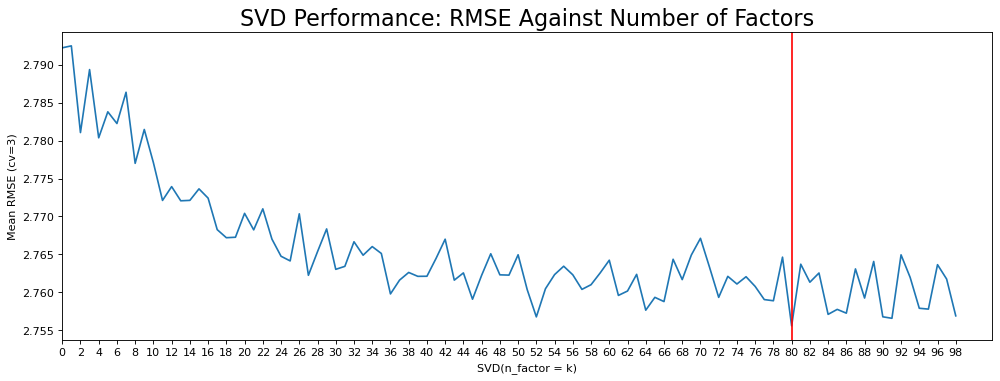

In [106]:
# initialize and run the feature checking function
rmse_svd = rmse_vs_factors(SVD,data)
# plot the results
plot_rmse(rmse_svd,"SVD", 100)

According to the figure, there is a decreasing trend of better performance with higher k. The lowest RMSE is achieved when 
k
=
80
. However, it is worth mentioning that 
k
=
52 and >84 are also good. The result suggests a range of values which can be used in GridSearchCV()for parameter tunning.

In [107]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30, 50], 'lr_all': [0.001, 0.005, 0.01, .1],
              'reg_all': [0.2, 0.4, 0.6], 'n_factors': [36,52,80,98,100]}

# Performing 3-fold gridsearch cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

2.7097656150739744
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.4, 'n_factors': 80}


In [108]:
# Build the optimized SVD model using optimal hyperparameter search
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.4, n_factors = 80, random_state = 1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)


# Let us compute precision@k, recall@k, and F_1 score with k = 10, and return the top 10 recommended songs:
rmse, mae, precision, recall, f1_score = precision_recall_at_k(svd_optimized)
popularity = ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', svd_optimized))['count_plays'].mean()
mod_comp = model_compare(mod_comp,'SVD_tuned',rmse, mae, precision, recall, f1_score, popularity, clean='no')
print(mod_comp)

RMSE: 2.6736
MAE:  2.1434
             algorithm      rmse       mae  precision  recall  f1_score  \
0             KNNbasic  3.185239  2.575525      0.682   0.772     0.724   
1       KNNbasic_tuned  2.830942  2.254989      0.698   0.799     0.745   
2        KNNbasic_item  2.998977  2.254952      0.658   0.736     0.695   
3  KNNbasic_item_tuned  2.903997  2.301706      0.688   0.785     0.733   
4                  SVD  2.721453  2.168153      0.696   0.798     0.744   
5            SVD_tuned  2.673590  2.143426      0.694   0.799     0.743   

   popularity  
0        24.3  
1        64.9  
2        25.1  
3        25.5  
4       138.3  
5        43.2  


**Observations and Insights:**
- The tuned SVD model has a slightly lower RMSE and MAE than the base SVD model
- the f1_score of the the tuned SVD model increased .01
- The popularity of the tuned model dropped significantly
- The popularity of the base model may have been affected by a single highly rated song.

In [109]:
# Using svd_algo_optimized model to recommend for user heard and unheard songs
make_pred(svd_optimized)

predictions using <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x18ed870a0> for user 6d625c6557df84b60d90426c0116138b617b9449:
*************************
prediction for Red Dirt Road by Brooks and Dunn
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SODBSUF12A8C141975 r_ui = 10.00   est = 8.22   {'was_impossible': False}
*************************
predictions for Till I collapse by Eminem and Nate Dogg
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOBPKPW12A6701E8F9 r_ui = 1.00   est = 4.71   {'was_impossible': False}
*************************
prediction for SOTTGXB12A6701FA0B by Phoenix (other pheonix songs are 7.6
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOTTGXB12A6701FA0B r_ui = None   est = 5.13   {'was_impossible': False}


**Observations and Insights:**
- The predictions for the heard song with rating 10 is about the same as the untuned model
- the prediction for the heard song with rating 1 came up a bit to 2
- In general the predicted ratings are much better than the non matrix factorization models, but tuning the SVD model did not improve performance much if at all.

In [111]:
# Ranking songs based on above recommendations
ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', svd))

,title,artist_name,count_plays,predicted_interaction,corrected_ratings
0,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon,616,10.000000,9.959709
1,Clara meets Slope - Hard To Say,Clara Hill,89,9.879379,9.773379
2,Make Her Say,Kid Cudi / Kanye West / Common,156,9.186673,9.106609
3,Something (Album Version),Jaci Velasquez,95,8.532769,8.430171
4,Electric Feel,MGMT,179,8.380396,8.305653
5,He's A Pirate,Klaus Badelt,20,8.514556,8.290949
6,221,keller williams,51,8.379492,8.239464
7,Gunn Clapp,O.G.C.,86,8.313128,8.205295
8,Call It Off (Album Version),Tegan And Sara,66,8.098702,7.975610
9,Girls,Death In Vegas,25,8.072738,7.872738


In [110]:
# Ranking songs based on above recommendations
ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', svd_optimized))

,title,artist_name,count_plays,predicted_interaction,corrected_ratings
0,False Pretense,The Red Jumpsuit Apparatus,21,7.612781,7.394563
1,Sorrow (1997 Digital Remaster),David Bowie,77,6.734795,6.620835
2,I'd Hate To Be You When People Find Out What T...,Mayday Parade,21,6.831190,6.612972
3,Recado Falado (Metrô Da Saudade),Alceu Valença,143,6.648431,6.564807
4,Q-Ball,Brotha Lynch Hung,33,6.705204,6.531126
5,Underground,Eminem,24,6.631778,6.427654
6,Cold Blooded (Acid Cleanse),The fFormula,38,6.565968,6.403747
7,Walk Through Hell (featuring Max Bemis Acousti...,Say Anything,31,6.578550,6.398944
8,Night Village,Deep Forest,20,6.575026,6.351420
9,Drive,Savatage,24,6.539166,6.335042


**Observations and Insights:**
- The recommended songs from the tuned svd model are much different than the untuned svd model
- In general, it seems that the tuned model is recommending less popular songs

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [112]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10, and return the top 10 recommended songs:
rmse, mae, precision, recall, f1_score = precision_recall_at_k(clust_baseline)
popularity = ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', clust_baseline))['count_plays'].mean()
mod_comp = model_compare(mod_comp,'CoClustering',rmse, mae, precision, recall, f1_score, popularity, clean='no')
print(mod_comp)

RMSE: 2.9591
MAE:  2.2116
             algorithm      rmse       mae  precision  recall  f1_score  \
0             KNNbasic  3.185239  2.575525      0.682   0.772     0.724   
1       KNNbasic_tuned  2.830942  2.254989      0.698   0.799     0.745   
2        KNNbasic_item  2.998977  2.254952      0.658   0.736     0.695   
3  KNNbasic_item_tuned  2.903997  2.301706      0.688   0.785     0.733   
4                  SVD  2.721453  2.168153      0.696   0.798     0.744   
5            SVD_tuned  2.673590  2.143426      0.694   0.799     0.743   
6         CoClustering  2.959111  2.211564      0.622   0.666     0.643   

   popularity  
0        24.3  
1        64.9  
2        25.1  
3        25.5  
4       138.3  
5        43.2  
6        37.3  


**Observations and Insights:**
- The clustering model has an RMSE of 2.9 and MAE of 2.2
- The f1 score is .643
- Overal the clustering metrics are performing similarly slightly poorer compared to other models

In [113]:
# Making predictions for heard and unheard songs
make_pred(clust_baseline)

predictions using <surprise.prediction_algorithms.co_clustering.CoClustering object at 0x18ed866e0> for user 6d625c6557df84b60d90426c0116138b617b9449:
*************************
prediction for Red Dirt Road by Brooks and Dunn
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SODBSUF12A8C141975 r_ui = 10.00   est = 4.71   {'was_impossible': False}
*************************
predictions for Till I collapse by Eminem and Nate Dogg
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOBPKPW12A6701E8F9 r_ui = 1.00   est = 4.00   {'was_impossible': False}
*************************
prediction for SOTTGXB12A6701FA0B by Phoenix (other pheonix songs are 7.6
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOTTGXB12A6701FA0B r_ui = None   est = 3.17   {'was_impossible': False}


**Observations and Insights:**
- The predicted rating for the song with rating 10 is 4.71
- The predictions for the other heard song with raitng 1 is 4

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [114]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 9, 18, 36], 'n_cltr_i': [3, 9, 18, 36], 'n_epochs': [30, 40, 50]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])

3.0094114249385258
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 40}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [116]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 40, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10, and return the top 10 recommended songs:
rmse, mae, precision, recall, f1_score = precision_recall_at_k(clust_tuned)
popularity = ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', clust_tuned))['count_plays'].mean()
mod_comp = model_compare(mod_comp,'CoClustering_tuned',rmse, mae, precision, recall, f1_score, popularity, clean='no')
print(mod_comp)

RMSE: 2.9613
MAE:  2.2139
             algorithm      rmse       mae  precision  recall  f1_score  \
0             KNNbasic  3.185239  2.575525      0.682   0.772     0.724   
1       KNNbasic_tuned  2.830942  2.254989      0.698   0.799     0.745   
2        KNNbasic_item  2.998977  2.254952      0.658   0.736     0.695   
3  KNNbasic_item_tuned  2.903997  2.301706      0.688   0.785     0.733   
4                  SVD  2.721453  2.168153      0.696   0.798     0.744   
5            SVD_tuned  2.673590  2.143426      0.694   0.799     0.743   
6         CoClustering  2.959111  2.211564      0.622   0.666     0.643   
7   CoClustering_tuned  2.961292  2.213922      0.622   0.666     0.643   

   popularity  
0        24.3  
1        64.9  
2        25.1  
3        25.5  
4       138.3  
5        43.2  
6        37.3  
7        37.3  


**Observations and Insights:**
- Tuning the clustering model has not improved it

In [117]:
# Using co_clustering_optimized model to recommend for user heard and unheard songs
make_pred(clust_tuned)

predictions using <surprise.prediction_algorithms.co_clustering.CoClustering object at 0x18ed86d10> for user 6d625c6557df84b60d90426c0116138b617b9449:
*************************
prediction for Red Dirt Road by Brooks and Dunn
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SODBSUF12A8C141975 r_ui = 10.00   est = 4.70   {'was_impossible': False}
*************************
predictions for Till I collapse by Eminem and Nate Dogg
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOBPKPW12A6701E8F9 r_ui = 1.00   est = 3.99   {'was_impossible': False}
*************************
prediction for SOTTGXB12A6701FA0B by Phoenix (other pheonix songs are 7.6
user: 6d625c6557df84b60d90426c0116138b617b9449 item: SOTTGXB12A6701FA0B r_ui = None   est = 3.23   {'was_impossible': False}


**Observations and Insights:**
- The prediction for the heard song with rating 10 is 3.7

### Correcting the play_count and Ranking the above songs

In [118]:
# Ranking songs based on the above recommendations
ranking_songs(get_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', clust_tuned))

,title,artist_name,count_plays,predicted_interaction,corrected_ratings
0,Love Is Gone (Original Mix),David Guetta - Joachim Garraud - Chris Willis,20,8.561523,8.337917
1,Cold Blooded (Acid Cleanse),The fFormula,38,8.275809,8.113588
2,The World Is Mine,David Guetta,21,8.056761,7.838544
3,What Is Light? Where Is Laughter? (Album Version),Twin Atlantic,20,7.872448,7.648841
4,Kelma,Rachid Taha,58,7.642269,7.510962
5,Love Is Not A Fight,Warren Barfield,36,7.561523,7.394857
6,I Wonder Why,Dion & The Belmonts,41,7.517873,7.361699
7,Hasta siempre,Varios,20,7.552595,7.328988
8,Numb (Album Version),Disturbed,68,7.418666,7.297398
9,221,keller williams,51,7.411147,7.271119


**Observations and Insights:**
- Ther top 10 recommended songs are similar to the user-user and SVD models

# Part II: Content Based Recommendation System

So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well, and these features can be used to increase the personalization of the recommendation system. For example, we can use the artist name and album title to recommend songs to users from artists/albums they like but songs they have not heard yet. We can also include the year the song was released and recommedn music from the same time period. 

### Some Useful Functions

function to pre-process the text data:

In [119]:
# Create the tokenize function
def tokenize(text):
    
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    # Extracting each word in the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

Function to get top 20 similar songs based on text cosign similarity:

In [120]:
# Function that takes in song_id artist and album as input and returns the top 20 recommended songs
def text_recommendations(song_id, similar_songs):
    
    recommended_songs = []
    
    indices = pd.Series(artistAlbum_text.index)
    
    # Getting the index of the movie that matches the title
    idx = indices[indices == song_id].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indices of 20 most similar songs
    top_20_indexes = list(score_series.iloc[1 : 21].index)
    # print(top_20_indexes)
    
    # Populating the list with the titles of the best 10 matching movies
    for i in top_20_indexes:
        recommended_songs.append(list(artistAlbum_text.index)[i])
        
    return recommended_songs

Function to get user recommendations from cosign similarity text matrix based on a users top listened to songs:

In [121]:
def get_text_recommendations(data, user_id, similar_songs, algo, top_n=10):
    '''
    This function takes a data frame, a user_id, the cosign similarity matrix, a model, and the top n songs
    and recommends the top n songs based on the text similarity to artist and album name for a user based on their listening preferences
    '''
    # Creating an empty list to store the recommended song IDs
    recommendations = []
    
    # Get top rated songs for a user
    top_user_songs = data.loc[(data['user_id'] == user_id),['song_id','play_count_scaled']].drop_duplicates().sort_values('play_count_scaled', ascending=False).head(10)
    
    # Creating an user-item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count_scaled')
    
    # Extracting those movie IDs which the userId has not interacted yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through users top songs and getting recs
    for song in top_user_songs['song_id']:
        songs = text_recommendations(song, similar_songs)
        # print(songs)
        for name in songs:
            # Looping through each of the movie IDs which userId has not interacted yet
            if name in non_interacted_songs:

                # Predicting the ratings for those non interacted movie IDs by this user
                est = algo.predict(user_id, name).est

                # Appending the predicted ratings
                recommendations.append((name, est))

    # tuples from list of tuples
    recommendations = [t for t in (set(tuple(i) for i in recommendations))]
     
    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # # This is for making a rec list with actually song names instead of song id's:
    # df_recs = pd.DataFrame(recommendations[:top_n], columns = ['song_id','plays_count_scaled'])
    # df_recs = pd.merge(df_recs,data[['song_id','title','artist_name']], on ='song_id', how ="left")
    # df_recs = df_recs[['title','artist_name']].drop_duplicates().reset_index(drop=True)
    # print(df_recs)
    # Returing top n highest predicted rating movies for this user
    return recommendations[:top_n]

### Preprocessing features for tf-idf

In [131]:
# Select the columns 'song_id', 'artist_name', 'release', 'year' from cdf_filtered
artistAlbum_text = cdf_filtered[['song_id','artist_name','release','year']].copy()
# then create a feature where we convert the int 'year' to a text string for tf-idf
artistAlbum_text['year_text'] = ''
for idx,years in enumerate(artistAlbum_text['year']):
    if years == 0:
        artistAlbum_text.loc[idx,'year_text'] = ""
    elif years < 1970:
        artistAlbum_text.loc[idx,'year_text'] = "nineteensixties"
    elif 1970 <= years < 1980:
        artistAlbum_text.loc[idx,'year_text'] = "nineteenseventies"
    elif 1980 <= years < 1990:
        artistAlbum_text.loc[idx,'year_text'] = "nineteeneighties"
    elif 1990 <= years < 2000:
        artistAlbum_text.loc[idx,'year_text'] = "nineteennineties"
    elif 2000 <= years < 2010:
        artistAlbum_text.loc[idx,'year_text'] = "twothousandzeros"
    elif 2010 <= years < 2020:
        artistAlbum_text.loc[idx,'year_text'] = "twothousandtens"

In [132]:
artistAlbum_text.head()

,song_id,artist_name,release,year,year_text
0,SODGVGW12AC9075A8D,Justin Bieber,My Worlds,2010,twothousandtens
1,SODGVGW12AC9075A8D,Justin Bieber,My World 2.0,2010,twothousandtens
2,SOEPZQS12A8C1436C7,Deadmau5,Ghosts 'n' Stuff,2009,twothousandzeros
3,SOGDDKR12A6701E8FA,Eminem / Hailie Jade,The Eminem Show,2006,twothousandzeros
4,SOWGXOP12A6701E93A,Eminem,Without Me,2002,twothousandzeros


In [133]:
# concatentate the artist_name and release (album) name into a 'text' feature
artistAlbum_text['text'] = artistAlbum_text['artist_name']+' '+artistAlbum_text['release']+' '+artistAlbum_text['year_text']

# drop the artist_name and release columns
artistAlbum_text.drop(columns = ['artist_name','release','year'], inplace = True)

# Let's drop the duplicate records
artistAlbum_text.drop_duplicates(inplace = True)

# Set the index
artistAlbum_text = artistAlbum_text.set_index('song_id')

# look at first 5 records
artistAlbum_text.head()

,year_text,text
song_id,,
SODGVGW12AC9075A8D,twothousandtens,Justin Bieber My Worlds twothousandtens
SODGVGW12AC9075A8D,twothousandtens,Justin Bieber My World 2.0 twothousandtens
SOEPZQS12A8C1436C7,twothousandzeros,Deadmau5 Ghosts 'n' Stuff twothousandzeros
SOGDDKR12A6701E8FA,twothousandzeros,Eminem / Hailie Jade The Eminem Show twothousa...
SOWGXOP12A6701E93A,twothousandzeros,Eminem Without Me twothousandzeros


### tfidf and cosign similarity

In [134]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(artistAlbum_text['text'].values).toarray()

In [135]:
# Compute the cosine similarity for the tfidf above 
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

We can now either get recommendations based on a song, or get recommendations for a user with the function we made based on that users top songs

In [176]:
# Make recommendation for user 
ranking_songs(get_text_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', similar_songs, sim_item_item_optimized, top_n = 10))

,title,artist_name,count_plays,predicted_interaction,corrected_ratings
0,Cats In The Cradle,Ugly Kid Joe,30,7.789474,7.606899
1,Cold Blooded (Acid Cleanse),The fFormula,38,7.000000,6.837779
2,Hold Me_ Thrill Me_ Kiss Me_ Kill Me,U2,33,6.770725,6.596648
3,Twilight Galaxy,Metric,28,6.696697,6.507715
4,Last Nite,The Strokes,21,6.724206,6.505988
5,The Calculation (Album Version),Regina Spektor,44,6.636842,6.486086
6,Mansard Roof (Album),Vampire Weekend,26,6.587426,6.391310
7,Face To Face,Daft Punk,32,6.525241,6.348465
8,Injection,Rise Against,23,6.485387,6.276872
9,Chinese,Lily Allen,14,6.092105,5.824844


**Observations and Insights:**
- This is excellent, we are recommending songs by the same artists/albums the user has likes and adding in some weight for the decade of the users song preferences. 
- We are also ranking the recommendations based on song popularity, so more listened to songs by other users will be weighted heavier for this user

# Part III: hybrid recommendation system
We have explored five different recommender methods (six if you include the popularity-based method) for recommending songs to a user in a personalized way. This is all well and good, but how do we know which method is recommending songs the user will actualy listen to? As an avid listener of music, is it not also true that a users preferences can change, and may change drastically during the day or from day to day? It also seems that the models we have presented so far sometimes recommend similar songs, but other models are drastically different as in the item-item recommendations and content based recommendations. In this section, I build a hybrid recommender system which takes into account recommendations from multiple models, applys weights based on which models we want to be most represented in the results, and then provides a 'hybrid' recommendation. 

### Functions

define a function to combine the predictions using the weights to combine recommender matrices from multiple models and compute the RMSE score:

In [177]:
def hybrid_prediction(pred_a, pred_b, wA, wB):
    """
    Combines the predictions of Algorithm A and Algorithm B using weights wA and wB, respectively.
    Returns the combined predictions and the RMSE score.
    """
    # combine predictions as dataframes
    df_a = pd.DataFrame(pred_a)
    df_b = pd.DataFrame(pred_b)
    
    df_hybrid = pd.merge(df_a,df_b, on = ['uid','iid'], how = 'inner')
    # print(df_hybrid.head())
    # iterate through predictions, apply weight, and add together into hybrid prediction
    for i in range(len(df_hybrid)):
        df_hybrid.loc[i,'hybrid_rating'] = (wA * df_hybrid.est_x[i]) + (wB * df_hybrid.est_y[i])
    # to turn it back into a suprise list of tuples, first slim down and rename columns
    df_hybrid = df_hybrid[['uid', 'iid', 'r_ui_x', 'hybrid_rating', 'details_x']].rename(columns={'uid' : 'uid', 'iid' : 'iid', 'r_ui_x' : 'r_ui', 'hybrid_rating' : 'est', 'details_x' : 'details'})
    #then convert df to list of tuples
    pred_hybrid = list(df_hybrid.itertuples(index=False,name='predictions'))
    # return metrics 
    rmse_score=rmse(pred_hybrid)
    mae_score=mae(pred_hybrid)
    return df_hybrid, pred_hybrid, rmse_score, mae_score

Function to combine matrices from multiple models, with specified weightings, and Content Based recommendations, and output hybrid recommendation list:

In [184]:
def hybrid_recommendations(data, user_id, algo_a, algo_b, wA, wB, top_n=10):
    '''
    Combines the predictions of Algorithm A and Algorithm B using weights wA and wB, respectively.
    merges recs from weighted models and Content Based (artist/release) mrecommendations into a single hybrid rec list
    Returns the hybrid recommendation list of songs for user.
    '''
    # Creating an empty list to store the recommended song IDs
    recommendations = []
    
    # Creating an user-item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count_scaled')
    
    # Extracting those song IDs which the userId has not interacted yet
    non_interacted_movies = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the song IDs which userId has not interacted yet
    for item_id in non_interacted_movies:
        
        # Predicting the ratings for those non interacted song IDs by this user
        est_a = algo_a.predict(user_id, item_id).est
        est_b = algo_b.predict(user_id, item_id).est
        est = wA * est_a + wB * est_b
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)
    n = top_n/2
    p = top_n/5
    u = int(n+p)
    v = int(n-p)
    play_count_recs = recommendations[:u]
    text_recs = get_text_recommendations(data,user_id, similar_songs, sim_item_item_optimized, top_n = v) #  svd_optimized
    final_recs = play_count_recs + text_recs

    return final_recs

Here I fit models and make predictions for two models:
- SVD (default settings)
- User-User collaborative Filtering (tuned)<br>

I chose these two models because both had the best F1_scores metrics, both had fairly good predictions, and both recommended markedly different songs. 

- I then add in a subset of recommendations from the content-based filtering method to increase the 'familiarity' for the user of the recommended songs/artists

This will hopefully provide a highly personalized recommendation for a user with a balance of new songs and familiar artists to give choices based on potential dynamic user preferences.



In [180]:
# Train Algorithm A
algo_a =  SVD(random_state = 1)
algo_a.fit(trainset)
pred_a = algo_a.test(testset)

# Train Algorithm B
sim_options = {'name': 'msd', 'user_based': True}
algo_b = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1, verbose = False)
algo_b.fit(trainset)
pred_b = algo_b.test(testset)

now evaluate the performance of different weight combinations using the hold-out set. For example, we can try different combinations of wA and wB, ranging from (0.1, 0.9) to (0.9, 0.1), and compute their respective RMSE scores:

In [181]:
# Define the weight combinations to try
weights = [(0.1, 0.9), (0.3, 0.7), (0.5, 0.5), (0.7, 0.3), (0.9, 0.1)]

# Compute the RMSE score for each weight combination
# NOTE: If this function fails with a 'TypeError' np.float64, reload the packages and run again
for wA, wB in weights:
    df_hybrid, pred_hybrid, rmse_score, mae_score = hybrid_prediction(pred_a, pred_b, wA, wB) 
    print(f'Weight combination ({wA}, {wB}): RMSE = {rmse_score:.4f}, MAE = {mae_score:.4f}')

RMSE: 2.7976
MAE:  2.2302
Weight combination (0.1, 0.9): RMSE = 2.7976, MAE = 2.2302
RMSE: 2.7495
MAE:  2.1971
Weight combination (0.3, 0.7): RMSE = 2.7495, MAE = 2.1971
RMSE: 2.7186
MAE:  2.1749
Weight combination (0.5, 0.5): RMSE = 2.7186, MAE = 2.1749
RMSE: 2.7057
MAE:  2.1634
Weight combination (0.7, 0.3): RMSE = 2.7057, MAE = 2.1634
RMSE: 2.7110
MAE:  2.1619
Weight combination (0.9, 0.1): RMSE = 2.7110, MAE = 2.1619


**Observations and Insights:**
- there is not much difference in RMSE for the different combinations of model weights
- The 'best' weight combination is SVD .7 - collaborative filtering .3

In [189]:
# tune the hybrid recommender with the weights from the previous step and run it:
results = ranking_songs(hybrid_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', algo_a, algo_b, 0.7, 0.3, top_n=20))
print('popularity of recommended songs: ',results['count_plays'].mean())
results

popularity of recommended songs:  85.1


,title,artist_name,count_plays,predicted_interaction,corrected_ratings
0,Clara meets Slope - Hard To Say,Clara Hill,89,9.677092,9.571092
1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon,616,8.470891,8.430600
2,Make Her Say,Kid Cudi / Kanye West / Common,156,7.772713,7.692649
3,Cats In The Cradle,Ugly Kid Joe,30,7.789474,7.606899
4,Recado Falado (Metrô Da Saudade),Alceu Valença,143,7.642525,7.558901
5,#40,DAVE MATTHEWS BAND,72,7.661807,7.543956
6,Walk Through Hell (featuring Max Bemis Acousti...,Say Anything,31,7.678929,7.499324
7,Eternal Flame (Single Version),Atomic Kitten,49,7.411352,7.268495
8,Love Is Not A Fight,Warren Barfield,36,7.379032,7.212366
9,Voices On A String (Album Version),Thursday,128,7.295797,7.207409


## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- In General the Method 2 dataset had better MSE and MAE than the method 1 dataset, but the Method 1 dataset had better f1_score and the predictions for listened to songs were closer to the actual playcounts
- The SVD and user-user based models performed the best according to RMSE, MAE, and f1
- The item-item model recommended different songs that the SVD, clustering, and user-user
- In general, tuning the models did improve their performance, however it became clear that one of the biggest effects on model performance is the data going into the model. 
- The Content based recommender system, just based on artist name, album title and year does a decent job of recommending artists the user likes, and songs from albums the user has listened to.
- Many of the songs in the SVD,clustering, collaboritive filtering recommendations were not artists in the users top listened artist/song list, therefore I added the Content Based Recommendations into the hybrid recommender system.
- I chose to tune my hybrid recommendation system using SVD with default settings because it was the best performing model, and user-user collaborative Filtering model. Combining these added more potential song diversity that might align with the user preferences into the final recommendation. 
- I also added content-based recommendations into the hybrid model for 'familiarity'
- There is room for improvement in the performance of the models and final recommender system:
 - more features such as genre, loudness, danceability, and lyrics could be added as features to improve Content based recommendations
 - Further improvement could be made on filtering/scaling the play_counts to achieve better predictions
 - A different approach could be tried, such as Neural Networks

**2. Refined insights**:
- The impact of the Y variable - in this case play_count - cannot be understated. 
- The distribution and scarcity in the play_counts, and how I chose to filter and transform it had large impacts on the model performance
- The Content-based recommender system, although perhaps the 'simplist' of the models besides the popularity based recommender system, performs predictably and precisely recommends songs based on content
- matrix factorization outperformed other models. It runs quickly, and while it has only marginally better performace metrics than other collaborative or cluster-based models, its predictions were the closest to actual.
- The metrics you choose to assess model performance with are extremely important. depending on the metrics you choose, they can change the decisions you make about models and recommendations.

**3. Proposal for the final solution design:** 
- I am proposing the hybrid recommender system I built be adopted. It provides a good balance of artists/albums the user is known to like, but may not have listened to other songs of, and new content recommended by usesr-user collaborative filtering and matrix factorization,
- In short, it is highly personalized!
- This hybrid recommender system could be adjusted and improved further based on more features for content-based recommending or alternative compositions of models/weights

**Final 10 song recommendation for user 6d625c6557df84b60d90426c0116138b617b9449:** 

In [187]:
# Recommending top 10 songs for user '6ccd111af9b4baa497aacd6d1863cbf5a141acc6' with hybrid recommender system
results = ranking_songs(hybrid_recommendations(cdf_filtered,'6d625c6557df84b60d90426c0116138b617b9449', algo_a, algo_b, 0.7, 0.3, top_n=10))
results

,title,artist_name,count_plays,predicted_interaction,corrected_ratings
0,Clara meets Slope - Hard To Say,Clara Hill,89,9.677092,9.571092
1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon,616,8.470891,8.430600
2,Make Her Say,Kid Cudi / Kanye West / Common,156,7.772713,7.692649
3,Cats In The Cradle,Ugly Kid Joe,30,7.789474,7.606899
4,Recado Falado (Metrô Da Saudade),Alceu Valença,143,7.642525,7.558901
5,#40,DAVE MATTHEWS BAND,72,7.661807,7.543956
6,Walk Through Hell (featuring Max Bemis Acousti...,Say Anything,31,7.678929,7.499324
7,Eternal Flame (Single Version),Atomic Kitten,49,7.411352,7.268495
8,Cold Blooded (Acid Cleanse),The fFormula,38,7.000000,6.837779
9,Hold Me_ Thrill Me_ Kiss Me_ Kill Me,U2,33,6.770725,6.596648


# Executive Summary

### *Problem Summary*
<font size="4">        With the advent of smartphones and the consumer economy, there has been a revolution in the ways that people consume products and content. At the same time, digital music and digital music distribution platforms have become some of the most widely accessible and highly consumed product markets in the world. Yet with this deluge of digital music content comes a challenge: how do users find new content that they enjoy, and how do digital music platforms enable music discovery by users? These challenges are exacerbated by the fact that in the modern fast-paced world, people are often time or attention limited, there are other platforms competing for user attention, and digital content-based company's revenue often relies on the time consumers spend on, or interact with, its platform. These companies need to be able to figure out what kind of content is needed in order to increase customer time spent on their platform, the ammount of interaction had with their platform, and the overall satisfaction with a users experience on the platform. The key challenge for companies is in figuring out what kind of content their users are most likely to consume. Spotify is one such music content provider with a huge market base across the world. With the ever-increasing volume of streaming music becoming available, finding new music of interest has become a tedious task in and of itself. Spotify has grown significantly in the market because of its ability to make highly personalized music recommendations to each and every user of its platform based on a huge preference database gathered over time - millions of customers and billions of songs. This is done by using smart recommendation systems that can recommend songs based on users’ likes/dislikes, incorporating both content-based and latent features for song recommendations. However, the recommendation system used by Spotify and its parameter settings have remained a proprietary, closely-guarded secret. Here, I build a recommendation system to provide a top 10 of personalized song recommendations to a user that the user is most likely to enjoy/like/interact-with based on that users personal musical preferences. 
</font>

### *Solution Summary*
<font size="4">       In total, I explored six recommendation systems using the 1 millions songs dataset<sup>1</sup> as part of the solution design for this project: popularity-based, user-user collaborative filtering, item-item collaborative filtering, matrix factorization, cluster-based, and content-based. To evaluate the different models analyzed here, I relied on the F1_score, model predictions of user/song interactions, and the top 10 recommended songs by each model. These metrics clearly demonstrate a higher level of performance by three of the six models: matrix factorization (Singular Value Decomposition with default settings, with a 70% weight applied), user-user collaborative filtering (KNN basic algorithm with msd distance, max cluster size of 50, minimum cluster size of 9, and 30% weight applied), and the content-based model (tf-idf encoding and cosign-similarity distance on album title, artist name, and release year). Therefore,  I propose a Hybrid-Based Recommendation System, built by combining these three models with the specified parameters, be adopted for personalized recommendations of music with maximum user interaction potential. The proposed hybrid recommendation system boasts fast computational times, high prediction accuracy of user preferences, and a balanced recommendation of familiar and diverse new music for users. However, the model is subject to limitations such as a 'cold start' problem when making predictions for new users with few listens, and with the ever-increasing volume of songs becoming available and users adopting the platform this will lead to longer and longer computation times (and presumably less user satisfaction). Addtionally, the model generally favors popular artists and songs, which could have an impact on the music industry by making it more difficult for new artists to break into the scene using this platform.<br>
       Importantly, to reduce the computational resources required to test, train, and evaluate the solution design for this project, it was necessary to reduce the size of the dataset to make it more computationally tractable. The resulting filtered dataset reduced the original '1 million  songs' dataset (with 2 million records) to 121,900 records and increased the accuracy of predicted user interactions by reducing high degree of imbalance in the data from infrequent users and unpopular songs. While these results do not address the 'cold start' issue, they deomstrate the importance of a filtering step for making fast and relevant recommendations. Therefore, I suggest the application of a pre-recommendation filter as part of the final final solution design. Additionally, the content-based part of the recommendation system could also be improved by incorporating further features such as genre, lyrics, danceability, and encoded recordings. With these additions to the content portion of the recommendation system, the weight of the content-based model in the final hybrid recommendation system might be increased in future versions of the product. I recommend that these limitations and proposals be considered in future releases of the recommendation system for improved user personalization and increased user satisfaction.
</font> 

### *Recommendations for implementation*
<font size="4">        In the short-term I recommend the adoption of a hybrid recommendation system based on the recommender built in part III of this analysis, but with the inclusion of multiple additional content-based features like those discussed above. However, keeping in mind that this is a minimum viable product (MVP) that has not been tested on users, I recommend this hybrid recommendation system (MVP) be launched as a development version prior to deployment into production. With the deployment of the development version, the product could be introduced to a subset of randomly selected users, who would have songs recommended to them using multiple configurations of the hybrid system. User interactions with these recommendations could then be tracked to determine which recommendation configuration is the most successful at producing user interactions with the recommended material. Following evaluation of the development deployment, I recommend the hybrid system configuration and individual model weights be adjusted for maximum user interaction/satisfaction and deployed into production on the full user platform. Finally, I recommend that all user interactions on the platform be tracked along with other user data such as age, location, and gender. These data will provide key insights for ML Ops Engineers to retrain the recommendation system for future releases of the product. 
</font>

# References
1. Thierry Bertin-Mahieux, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere. The Million Song Dataset. In Proceedings of the 12th International Society for Music Information Retrieval Conference (ISMIR 2011), 2011.